# Demonstration: VQE algorithm

In [1]:
import pennylane as qml
from pennylane import numpy as np
import jax
import jax.numpy as jnp
from jax import jit
from functools import partial

from matplotlib import pyplot as plt

import copy
import tqdm  # Pretty progress bars
import joblib  # Writing and loading

import sys
sys.path.insert(0, '../')
import vqe
import ising_chain
import annni_model
import hamiltonians
import visualization as qplt
import losses
##############

In [2]:
# System parameters
N = 8
J = 1

# Learning parameters
lr = .3

### Ising Chain
$$H = - h \Sigma_i \sigma_z^i - J \Sigma_i \sigma_x^i\sigma_x^{i+1}\qquad\left[J\equiv 1, h \in [0,2*J]\right]$$

In [5]:
Hs = hamiltonians.hamiltonian(ising_chain.build_Hs, N = N, J = J, n_states = 100, ring = False)

In [6]:
myvqe = vqe.vqe(Hs, vqe.circuit_ising)

In [7]:
myvqe.train(.3, 10, circuit = True, recycle = True, reg = 0)
myvqe.train(.2, 10000, circuit = False, recycle = False, reg = 100, save_trajectories = True, epochs_batch_size = 1000)

+--- CIRCUIT ---+
0: ──||──H─╭C──RY(0.00)──────────────────────────────────────────────────────────────||──H─╭C
1: ──||──H─╰X─╭C─────────RY(1.00)────────────────────────────────────────────────────||──H─╰X
2: ──||──H────╰X────────╭C─────────RY(2.00)──────────────────────────────────────────||──H───
3: ──||──H──────────────╰X────────╭C─────────RY(3.00)────────────────────────────────||──H───
4: ──||──H────────────────────────╰X────────╭C─────────RY(4.00)──────────────────────||──H───
5: ──||──H──────────────────────────────────╰X────────╭C─────────RY(5.00)────────────||──H───
6: ──||──H────────────────────────────────────────────╰X────────╭C─────────RY(6.00)──||──H───
7: ──||──H──────────────────────────────────────────────────────╰X─────────RY(7.00)──||──H───

───RY(8.00)───────────────────────────────────────────────────────────────────||──H─╭C──RY(16.00)
──╭C─────────RY(9.00)─────────────────────────────────────────────────────────||──H─╰X─╭C────────
──╰X────────╭C─────────RY(10.00)─

100/100: 100%|██████████████████████████████████| 99/99 [00:25<00:00,  3.82it/s]
Cost: 0.0000 | Mean F.: 0.8756: 100%|████| 10000/10000 [01:04<00:00, 155.95it/s]


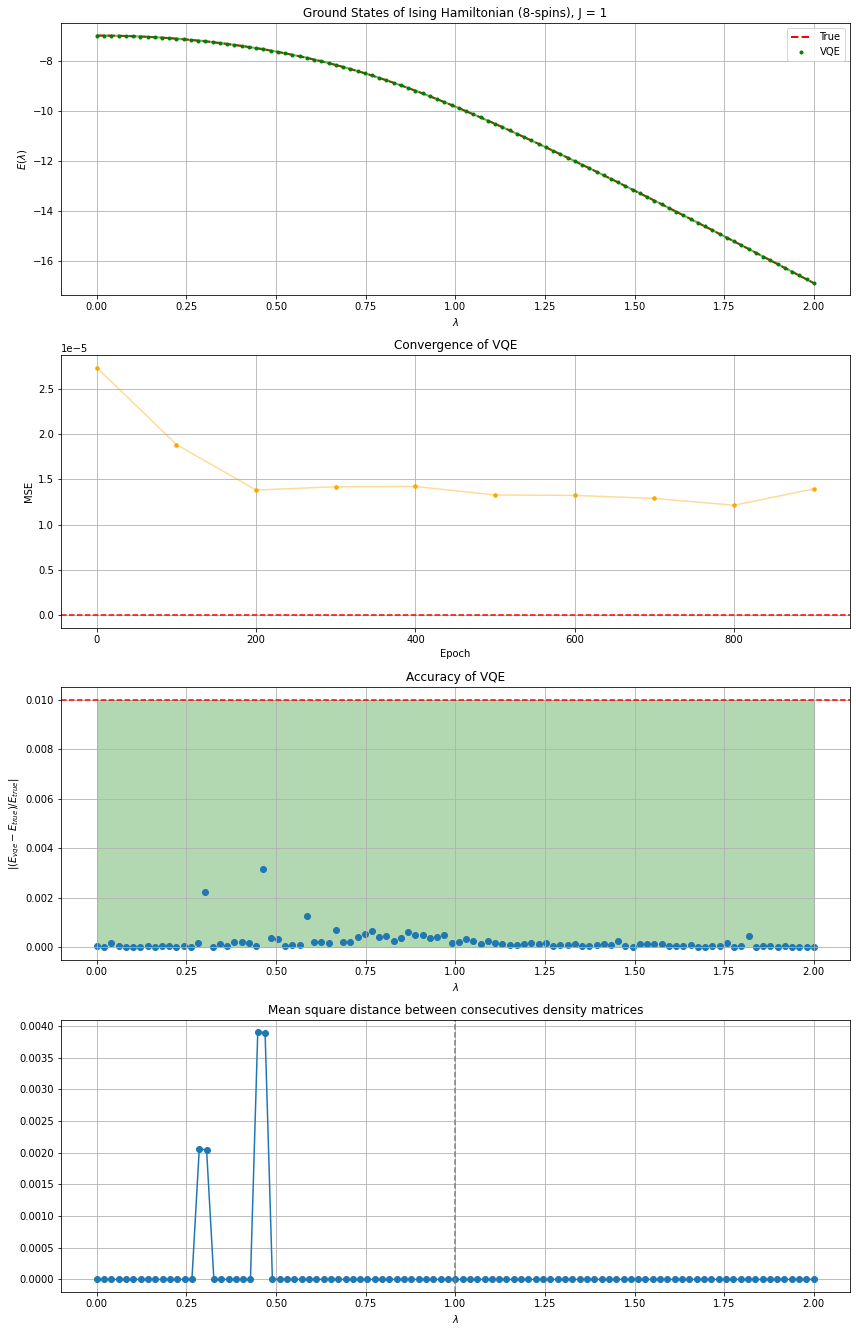

In [8]:
qplt.show_VQE_isingchain(myvqe)

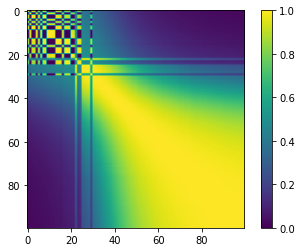

Mean Cross Fidelty: 0.5586610303730504


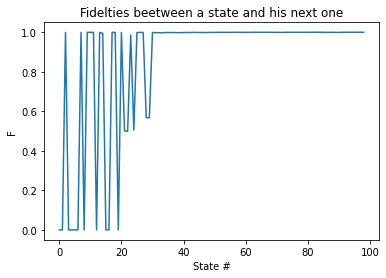

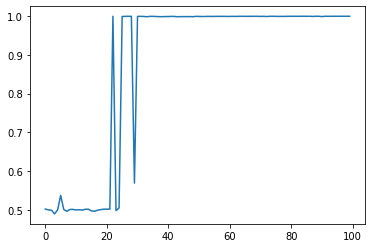

In [9]:
qplt.show_VQE_crossfidelties(myvqe)

In [ ]:
qplt.show_VQE_trajectory(myvqe, 50)

In [10]:
myvqe.save('../data/vqe_isingchain.pkl')

In [ ]:
qplt.show_true_crossfidelties(Hs, show_energy = False)

### ANNNI Model
$$H = - J_1\left( L \Sigma_i \sigma_z^i + \Sigma_i \sigma_x^i\sigma_x^{i+1} + K \Sigma_i \sigma_x^i\sigma_x^{i+2} \right) \qquad\left[{J_1}\equiv 1, L:=\frac{h}{J_1}, K:= \frac{J_2}{J_1}, L\in[0,2], K = [0, -J1]\right]$$

In [ ]:
Hs = hamiltonians.hamiltonian(annni_model.build_Hs, N = N, n_states = 10, ring = False)

In [ ]:
myvqe = vqe.vqe(Hs, vqe.circuit_ising)

In [ ]:
lr = .3

In [ ]:
myvqe.train(lr, 100, circuit = True, recycle = True, reg = 0)
myvqe.train(lr, 20000, circuit = False, recycle = False, reg = 1e-6)

In [ ]:
qplt.show_VQE_annni(myvqe)

In [ ]:
myvqe.save('../data/vqe_annni.pkl')